In [1]:
import numpy as np

In [2]:
from pyclouds.common import default_constants, make_related_constants
from pyclouds import parameterisations

constants = make_related_constants(default_constants)

In [3]:
Rd = constants.get('R_d')
Rv = constants.get('R_v')
g = constants.get('g')
cp_v = constants.get('cp_v')
cp_d = constants.get('cp_d')
print Rd, Rv

287.05 461.51


In [4]:
from pycfd.reference.atmospheric_flow import stratification_profiles, saturation_calculation

ambient_stratification = stratification_profiles.getStandardIsothermalAtmosphere()

In [5]:
z0 = 1000.

In [6]:
T0 = ambient_stratification.temp(z0)
p0 = ambient_stratification.p(z0)
print T0, p0

292.928375678 90171.0407308


In [7]:
qv0 = parameterisations.pv_sat.qv_sat(T=T0, p=p0)
qd0 = 1. - qv0
rho0 = p0/(Rd*qd0 + Rv*qv0)/T0
cp_m = qd0*cp_d + qv0*cp_v
print qv0, rho0

0.016265857545 1.06188084834


In [12]:
w = 2.0

In [16]:
dz = 1.

p = p0 - rho0*g*dz
T = T0 - g/cp_m*dz
qv_sat = parameterisations.pv_sat.qv_sat(T=T, p=p)
dq = qv0 - qv_sat
print dq, '{:.4f}%'.format((qv0/qv_sat - 1.)*100)

7.99861573594e-06 0.0492%


In [17]:
from pyclouds import cloud_microphysics, parameterisations
from pyclouds.common import Var, ATHAM_constants, default_constants
from pyclouds.plotting import plot_hydrometeor_evolution
from unified_microphysics import constants as um_constants

%matplotlib inline

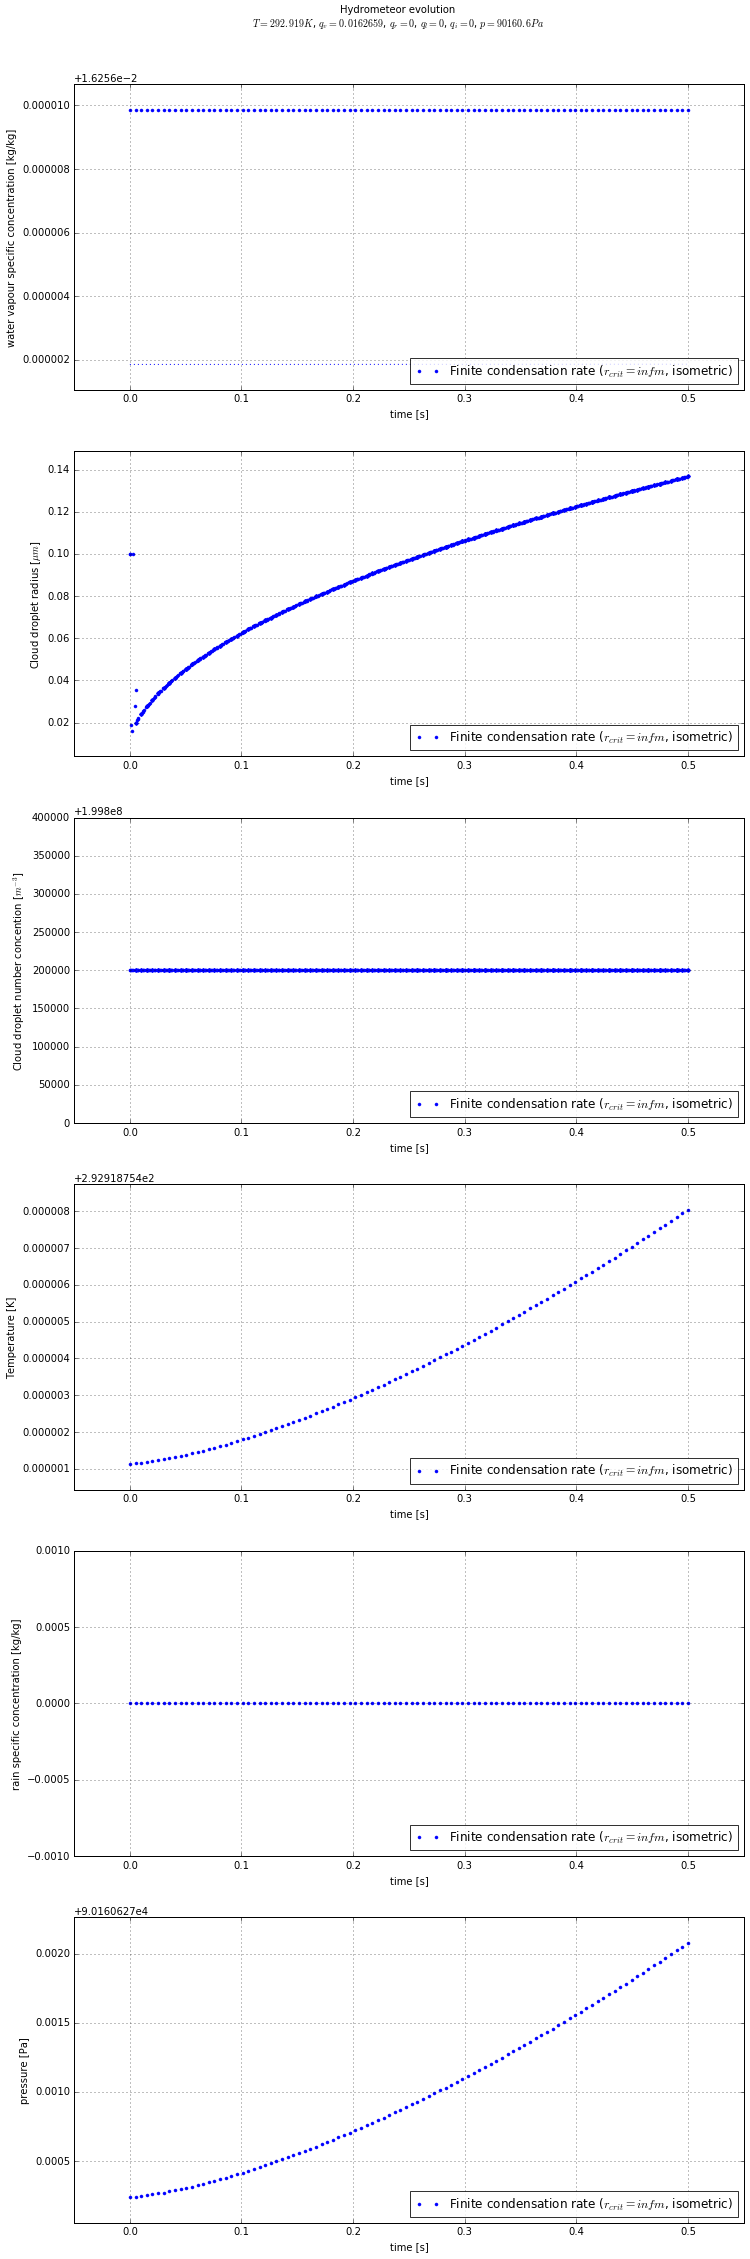

In [18]:
constants = default_constants

F0 = Var.make_state(p=p, T=T, q_v=qv0, q_l=0.0)

dt = dz/w

t_ = np.linspace(0., dt, 100)


kw = dict(constants=constants)
kw['model_constraint'] = 'isometric'

solutions = []
sol_fcond = cloud_microphysics.FiniteCondensationTimeMicrophysics(r_crit=np.inf, **kw).integrate(initial_condition=F0, t=t_)
solutions.append(sol_fcond)

plot = plot_hydrometeor_evolution(solutions, variables=['q_v', 'r_c', 'Nc', 'T', 'q_r', 'p'], initial_condition=F0)